# Bezier at work
Make sure you've run `../../gradlew shadowJar` from the `BoatDesign` folder for the imports to work.

In [1]:
%classpath add jar "../build/libs/BoatDesign-1.0-all.jar"

In [2]:
// Verify if the classpath above is taken in account
import gsg.SwingUtils.Box3D;
import gsg.SwingUtils.WhiteBoardPanel;
import gsg.VectorUtils;

import bezier.Bezier;
import boatdesign.threeD.BoatBox3D;

import java.awt.Color;
import java.awt.Font;
import java.awt.Dimension;

In [3]:
System.out.println(String.format("Running from folder %s", System.getProperty("user.dir")));
System.out.println(String.format("Java version %s", System.getProperty("java.version")));

Running from folder /Users/olivierlediouris/repos/raspberry-coffee/Project-Trunk/BoatDesign/jupyter
Java version 11.0.8


### The Bezier points, Rail and Keel

In [4]:
List<List<Double>> railPoints = List.of(
      List.of( 0.000000, 0.000000, 75.000000 ),
      List.of( 0.000000, 21.428571, 75.0 ),
      List.of(69.642857, 86.785714, 47.500000 ),
      List.of(305.357143, 156.428571, 45.357143 ),
      List.of(550.000000, 65.0, 56.000000 ));

List<List<Double>> keelPoints = List.of(
      List.of( 5.000000, 0.000000, -2.000000 ),
      List.of( 300.0, 0.000000, -45.0 ),
      List.of( 550.000000, 0.000000, 10.000000 ));

### Points to Bezier Control Points

In [5]:
List<Bezier.Point3D> railCtrlPoints = new ArrayList<>();
List<Bezier.Point3D> keelCtrlPoints = new ArrayList<>();

// Rail
railPoints.forEach(pt -> {
    railCtrlPoints.add(new Bezier.Point3D(pt.get(0), pt.get(1), pt.get(2)));
});
// Keel
keelPoints.forEach(pt -> {
    keelCtrlPoints.add(new Bezier.Point3D(pt.get(0), pt.get(1), pt.get(2)));
});

### The Panels for Display

In [6]:
WhiteBoardPanel whiteBoardXY = new WhiteBoardPanel(); // from above
WhiteBoardPanel whiteBoardXZ = new WhiteBoardPanel(); // side
WhiteBoardPanel whiteBoardYZ = new WhiteBoardPanel(); // facing
BoatBox3D box3D = new BoatBox3D();

In [7]:
box3D.setRailCtrlPoints(railCtrlPoints); // The rail.
box3D.setKeelCtrlPoints(keelCtrlPoints); // The keel.

In [8]:
// Override defaults (not mandatory)
// XY
whiteBoardXY.setAxisColor(Color.BLACK);
whiteBoardXY.setGridColor(Color.GRAY);
whiteBoardXY.setForceTickIncrement(50);
whiteBoardXY.setEnforceXAxisAt(0d);
whiteBoardXY.setEnforceYAxisAt(0d);

whiteBoardXY.setWithGrid(true);
whiteBoardXY.setBgColor(new Color(250, 250, 250, 255));
whiteBoardXY.setGraphicTitle(null); // "X not equals Y, Y ampl enforced [0, 100]");
whiteBoardXY.setSize(new Dimension(800, 200));
whiteBoardXY.setPreferredSize(new Dimension(600, 200));
whiteBoardXY.setTextColor(Color.RED);
whiteBoardXY.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 32));
whiteBoardXY.setGraphicMargins(30);
whiteBoardXY.setXEqualsY(true); // false);
// Enforce Y amplitude
whiteBoardXY.setForcedMinY(0d);
whiteBoardXY.setForcedMaxY(150d);

// XZ
whiteBoardXZ.setAxisColor(Color.BLACK);
whiteBoardXZ.setGridColor(Color.GRAY);
whiteBoardXZ.setForceTickIncrement(50);
whiteBoardXZ.setEnforceXAxisAt(0d);
whiteBoardXZ.setEnforceYAxisAt(0d);

whiteBoardXZ.setWithGrid(true);
whiteBoardXZ.setBgColor(new Color(250, 250, 250, 255));
whiteBoardXZ.setGraphicTitle(null); // "X not equals Y, Y ampl enforced [0, 100]");
whiteBoardXZ.setSize(new Dimension(800, 200));
whiteBoardXZ.setPreferredSize(new Dimension(600, 200));
whiteBoardXZ.setTextColor(Color.RED);
whiteBoardXZ.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 32));
whiteBoardXZ.setGraphicMargins(30);
whiteBoardXZ.setXEqualsY(true); // false);
// Enforce Y amplitude
whiteBoardXZ.setForcedMinY(-50d);
whiteBoardXZ.setForcedMaxY(100d);

// YZ
whiteBoardYZ.setAxisColor(Color.BLACK);
whiteBoardYZ.setGridColor(Color.GRAY);
whiteBoardYZ.setForceTickIncrement(50);
whiteBoardYZ.setEnforceXAxisAt(0d);
whiteBoardYZ.setEnforceYAxisAt(0d);

whiteBoardYZ.setWithGrid(true);
whiteBoardYZ.setBgColor(new Color(250, 250, 250, 255));
whiteBoardYZ.setGraphicTitle(null); // "X not equals Y, Y ampl enforced [0, 100]");
whiteBoardYZ.setSize(new Dimension(400, 200));
whiteBoardYZ.setPreferredSize(new Dimension(400, 200));
whiteBoardYZ.setTextColor(Color.RED);
whiteBoardYZ.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 32));
whiteBoardYZ.setGraphicMargins(30);
whiteBoardYZ.setXEqualsY(true); // false);
// Enforce Y amplitude
whiteBoardYZ.setForcedMinY(-50d);
whiteBoardYZ.setForcedMaxY(100d);

#### Prepare the data to display

In [9]:
// Generate the data, the Bézier curve(s).

// 1 - Rail Ctrl Points
Bezier railBezier = new Bezier(railCtrlPoints);
List<VectorUtils.Vector3D> bezierRailPoints = new ArrayList<>(); // The points to display.
if (railCtrlPoints.size() > 2) { // 3 points minimum.
    for (double t = 0; t <= 1.0; t += 1E-3) {
        Bezier.Point3D tick = railBezier.getBezierPoint(t);
        // System.out.println(String.format("%.03f: %s", t, tick.toString()));
        bezierRailPoints.add(new VectorUtils.Vector3D(tick.getX(), tick.getY(), tick.getZ()));
    }
}
double[] xRailCtrlPoints = railCtrlPoints.stream()
        .mapToDouble(bp -> bp.getX())
        .toArray();
double[] yRailCtrlPoints = railCtrlPoints.stream()
        .mapToDouble(bp -> bp.getY())
        .toArray();
double[] zRailCtrlPoints = railCtrlPoints.stream()
        .mapToDouble(bp -> bp.getZ())
        .toArray();
List<VectorUtils.Vector2D> railCtrlPtsXYVectors = new ArrayList<>();
for (int i = 0; i < xRailCtrlPoints.length; i++) {
    railCtrlPtsXYVectors.add(new VectorUtils.Vector2D(xRailCtrlPoints[i], yRailCtrlPoints[i]));
}
List<VectorUtils.Vector2D> railCtrlPtsXZVectors = new ArrayList<>();
for (int i = 0; i < xRailCtrlPoints.length; i++) {
    railCtrlPtsXZVectors.add(new VectorUtils.Vector2D(xRailCtrlPoints[i], zRailCtrlPoints[i]));
}
List<VectorUtils.Vector2D> railCtrlPtsYZVectors = new ArrayList<>();
for (int i = 0; i < yRailCtrlPoints.length; i++) {
    railCtrlPtsYZVectors.add(new VectorUtils.Vector2D(yRailCtrlPoints[i], zRailCtrlPoints[i]));
}

// Curve points
double[] xData = bezierRailPoints.stream()
        .mapToDouble(bp -> bp.getX())
        .toArray();
double[] yData = bezierRailPoints.stream()
        .mapToDouble(bp -> bp.getY())
        .toArray();
double[] zData = bezierRailPoints.stream()
        .mapToDouble(bp -> bp.getZ())
        .toArray();
List<VectorUtils.Vector2D> railDataXYVectors = new ArrayList<>();
for (int i = 0; i < xData.length; i++) {
    railDataXYVectors.add(new VectorUtils.Vector2D(xData[i], yData[i]));
}
List<VectorUtils.Vector2D> railDataXZVectors = new ArrayList<>();
for (int i = 0; i < xData.length; i++) {
    railDataXZVectors.add(new VectorUtils.Vector2D(xData[i], zData[i]));
}
List<VectorUtils.Vector2D> railDataYZVectors = new ArrayList<>();
for (int i = 0; i < yData.length; i++) {
    railDataYZVectors.add(new VectorUtils.Vector2D(yData[i], zData[i]));
}
// 2 - Keel Ctrl Points
Bezier keelBezier = new Bezier(keelCtrlPoints);
List<VectorUtils.Vector3D> bezierKeelPoints = new ArrayList<>(); // The points to display.
if (keelCtrlPoints.size() > 2) { // 3 points minimum.
    for (double t = 0; t <= 1.0; t += 1E-3) {
        Bezier.Point3D tick = keelBezier.getBezierPoint(t);
        // System.out.println(String.format("%.03f: %s", t, tick.toString()));
        bezierKeelPoints.add(new VectorUtils.Vector3D(tick.getX(), tick.getY(), tick.getZ()));
    }
}
double[] xKeelCtrlPoints = keelCtrlPoints.stream()
        .mapToDouble(bp -> bp.getX())
        .toArray();
double[] yKeelCtrlPoints = keelCtrlPoints.stream()
        .mapToDouble(bp -> bp.getY())
        .toArray();
double[] zKeelCtrlPoints = keelCtrlPoints.stream()
        .mapToDouble(bp -> bp.getZ())
        .toArray();
List<VectorUtils.Vector2D> keelCtrlPtsXYVectors = new ArrayList<>();
for (int i = 0; i < xKeelCtrlPoints.length; i++) {
    keelCtrlPtsXYVectors.add(new VectorUtils.Vector2D(xKeelCtrlPoints[i], yKeelCtrlPoints[i]));
}
List<VectorUtils.Vector2D> keelCtrlPtsXZVectors = new ArrayList<>();
for (int i = 0; i < xKeelCtrlPoints.length; i++) {
    keelCtrlPtsXZVectors.add(new VectorUtils.Vector2D(xKeelCtrlPoints[i], zKeelCtrlPoints[i]));
}
List<VectorUtils.Vector2D> keelCtrlPtsYZVectors = new ArrayList<>();
for (int i = 0; i < yKeelCtrlPoints.length; i++) {
    keelCtrlPtsYZVectors.add(new VectorUtils.Vector2D(yKeelCtrlPoints[i], zKeelCtrlPoints[i]));
}

// Curve points
xData = bezierKeelPoints.stream()
        .mapToDouble(bp -> bp.getX())
        .toArray();
yData = bezierKeelPoints.stream()
        .mapToDouble(bp -> bp.getY())
        .toArray();
zData = bezierKeelPoints.stream()
        .mapToDouble(bp -> bp.getZ())
        .toArray();
List<VectorUtils.Vector2D> keelDataXYVectors = new ArrayList<>();
for (int i = 0; i < xData.length; i++) {
    keelDataXYVectors.add(new VectorUtils.Vector2D(xData[i], yData[i]));
}
List<VectorUtils.Vector2D> keelDataXZVectors = new ArrayList<>();
for (int i = 0; i < xData.length; i++) {
    keelDataXZVectors.add(new VectorUtils.Vector2D(xData[i], zData[i]));
}
List<VectorUtils.Vector2D> keelDataYZVectors = new ArrayList<>();
for (int i = 0; i < yData.length; i++) {
    keelDataYZVectors.add(new VectorUtils.Vector2D(yData[i], zData[i]));
}

whiteBoardXY.resetAllData();
whiteBoardXZ.resetAllData();
whiteBoardYZ.resetAllData();

// Bezier ctrl points series
// XY - Rail
WhiteBoardPanel.DataSerie railCtrlXYSerie = new WhiteBoardPanel.DataSerie()
        .data(railCtrlPtsXYVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardXY.addSerie(railCtrlXYSerie);
// XY - Keel
WhiteBoardPanel.DataSerie keelCtrlXYSerie = new WhiteBoardPanel.DataSerie()
        .data(keelCtrlPtsXYVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardXY.addSerie(keelCtrlXYSerie);

// XZ - Rail
WhiteBoardPanel.DataSerie railCtrlXZSerie = new WhiteBoardPanel.DataSerie()
        .data(railCtrlPtsXZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardXZ.addSerie(railCtrlXZSerie);
// XZ - Keel
WhiteBoardPanel.DataSerie keelCtrlXZSerie = new WhiteBoardPanel.DataSerie()
        .data(keelCtrlPtsXZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardXZ.addSerie(keelCtrlXZSerie);

// YZ - Rail
WhiteBoardPanel.DataSerie railCtrlYZSerie = new WhiteBoardPanel.DataSerie()
        .data(railCtrlPtsYZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardYZ.addSerie(railCtrlYZSerie);
// YZ - Keel
WhiteBoardPanel.DataSerie keelCtrlYZSerie = new WhiteBoardPanel.DataSerie()
        .data(keelCtrlPtsYZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardYZ.addSerie(keelCtrlYZSerie);

// Bezier points series
// XY - Rail
WhiteBoardPanel.DataSerie railDataXYSerie = new WhiteBoardPanel.DataSerie()
        .data(railDataXYVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardXY.addSerie(railDataXYSerie);
// XY - Keel
WhiteBoardPanel.DataSerie keelDataXYSerie = new WhiteBoardPanel.DataSerie()
        .data(keelDataXYVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardXY.addSerie(keelDataXYSerie);

// XZ - Rail
WhiteBoardPanel.DataSerie railDataXZSerie = new WhiteBoardPanel.DataSerie()
        .data(railDataXZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardXZ.addSerie(railDataXZSerie);
// XZ - Keel
WhiteBoardPanel.DataSerie keelDataXZSerie = new WhiteBoardPanel.DataSerie()
        .data(keelDataXZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardXZ.addSerie(keelDataXZSerie);

// YZ - Rail
WhiteBoardPanel.DataSerie railDataYZSerie = new WhiteBoardPanel.DataSerie()
        .data(railDataYZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardYZ.addSerie(railDataYZSerie);
// YZ - Keel
WhiteBoardPanel.DataSerie keelDataYZSerie = new WhiteBoardPanel.DataSerie()
        .data(keelDataYZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardYZ.addSerie(keelDataYZSerie);

### First display

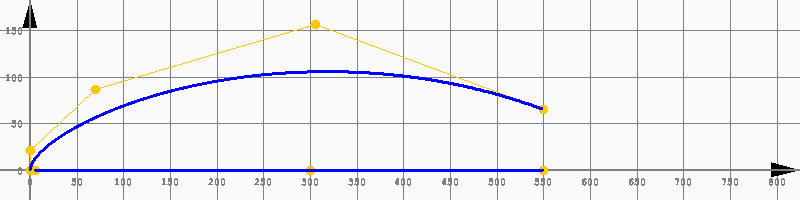

In [10]:
whiteBoardXY.getImage();  // This is for a Jupyter Notebook context

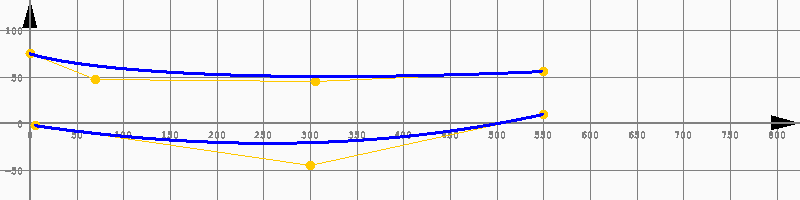

In [11]:
whiteBoardXZ.getImage();  // This is for a Jupyter Notebook context

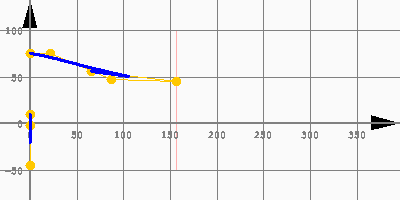

In [12]:
whiteBoardYZ.getImage();  // This is for a Jupyter Notebook context

In [13]:
box3D.repaint();
// box3D.refreshData();
box3D.setRotOnX(-18d);
box3D.setRotOnZ(-27d);

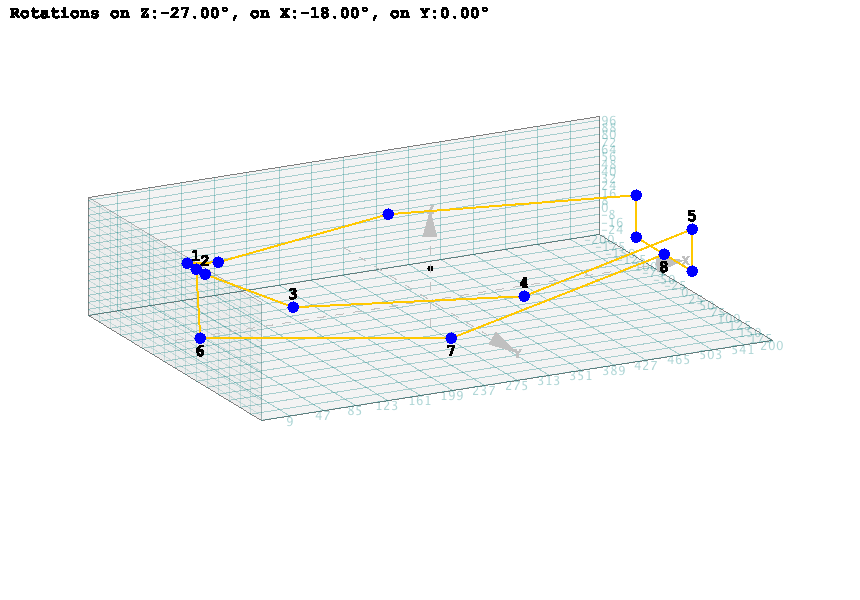

In [14]:
box3D.getImage();

### Without box faces

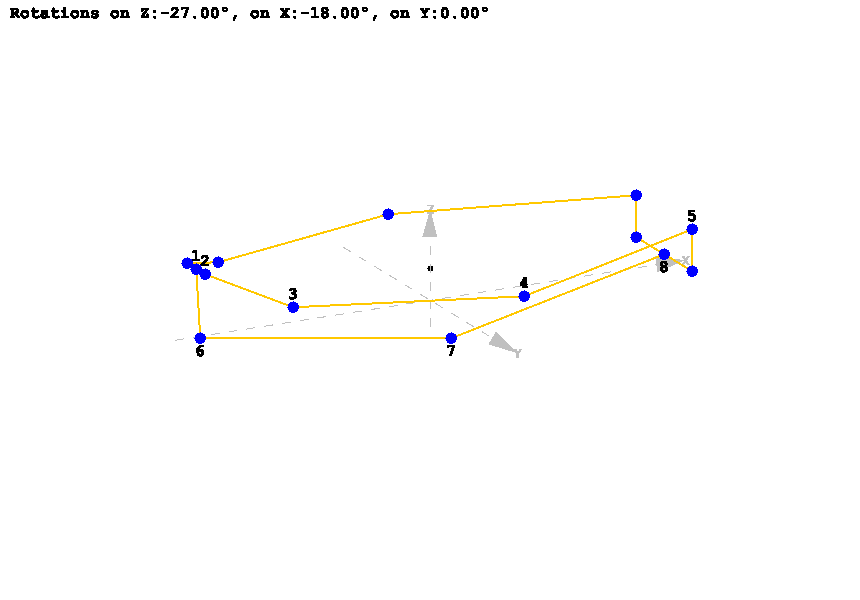

In [15]:
box3D.setWithBoxFaces(false);
box3D.getImage();

#### Rework the display

In [16]:
box3D.setSymmetrical(true);
box3D.setJustTheBoat(true);
box3D.setFrames(true);
box3D.setWaterlines(true);
box3D.setButtocks(true);
box3D.setDrawFrameCtrlPoints(false);

box3D.setWithAxis(false);
box3D.setWithBoxFaces(false); // Already set, but OK.

box3D.setZoom(1.5);

#### Refresh data (Recalculate the boat, that takes time...)

In [17]:
box3D.refreshData(true, dataMap -> {
                System.out.println("Callback Data:\n" + dataMap.toString());
            });

Max Width: 105.870535, at X:317.536272
LWL: 494.792866
Max Depth: -20.867200, at X:255.888000
... Calculating frame -265.000... (area: 11.173759)  in 369 ms.
... Calculating frame -255.000... (area: 31.170488)  in 108 ms.
... Calculating frame -245.000... (area: 60.399230)  in 58 ms.
... Calculating frame -235.000... (area: 97.755751)  in 423 ms.
... Calculating frame -225.000... (area: 142.531172)  in 77 ms.
... Calculating frame -215.000... (area: 193.281226)  in 525 ms.
... Calculating frame -205.000... (area: 249.354531)  in 95 ms.
... Calculating frame -195.000... (area: 309.814714)  in 782 ms.
... Calculating frame -185.000... (area: 373.690582)  in 604 ms.
... Calculating frame -175.000... (area: 439.987537)  in 638 ms.
... Calculating frame -165.000... (area: 507.196887)  in 667 ms.
... Calculating frame -155.000... (area: 574.989665)  in 697 ms.
... Calculating frame -145.000... (area: 642.618530)  in 746 ms.
... Calculating frame -135.000... (area: 709.359922)  in 781 ms.
...

We will need to add the first point X: -207.965620, Y:0.000000, Z: -10.014872
We will need to add the first point X: -207.965620, Y:0.000000, Z: -10.014872
We will need to add the first point X: -207.965620, Y:0.000000, Z: -10.014872
We will need to add the first point X: -207.965620, Y:0.000000, Z: -10.014872
We will need to add the first point X: -207.965620, Y:0.000000, Z: -10.014872
We will need to add the first point X: -207.965620, Y:0.000000, Z: -10.014872
We will need to add the first point X: -207.965620, Y:0.000000, Z: -10.014872
We will need to add the first point X: -207.965620, Y:0.000000, Z: -10.014872
WL -10.00: 18026.596824 (cm 2)
Waterline for z=0.0
For Z:0.0, first WL point X: -270.000000, Y:0.000000, Z: -2.000000, last WL point X: 224.550000, Y:0.000000, Z: -0.020000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.00000

We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000
We will need to add the first point X: -270.000000, Y:0.000000, Z: -2.000000

For Y:90.0, first point X: -103.112834, Y:90.012549, Z: 54.047820, last point X: 190.669157, Y:89.930595, Z: 52.906301
Vline not found for Y=90.00, X=-265.00
We will need to add the first point X: -103.112834, Y:90.012549, Z: 54.047820
Vline not found for Y=90.00, X=-255.00
We will need to add the first point X: -103.112834, Y:90.012549, Z: 54.047820
Vline not found for Y=90.00, X=-245.00
We will need to add the first point X: -103.112834, Y:90.012549, Z: 54.047820
Vline not found for Y=90.00, X=-235.00
We will need to add the first point X: -103.112834, Y:90.012549, Z: 54.047820
Vline not found for Y=90.00, X=-225.00
We will need to add the first point X: -103.112834, Y:90.012549, Z: 54.047820
Vline not found for Y=90.00, X=-215.00
We will need to add the first point X: -103.112834, Y:90.012549, Z: 54.047820
Vline not found for Y=90.00, X=-205.00
We will need to add the first point X: -103.112834, Y:90.012549, Z: 54.047820
Vline not found for Y=90.00, X=-195.00
We will need to add the

#### And get the new display!

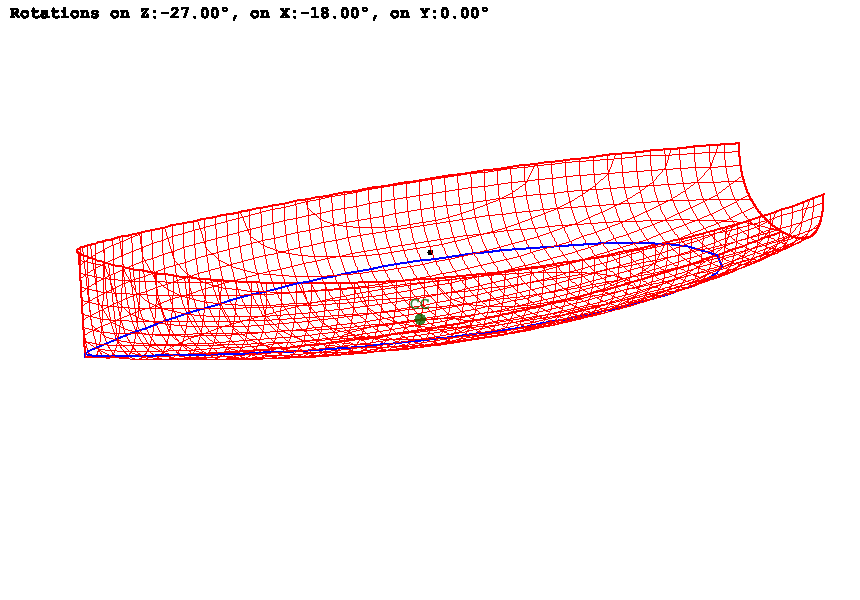

In [18]:
box3D.getImage();

Wow! Cool!

--- 